In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


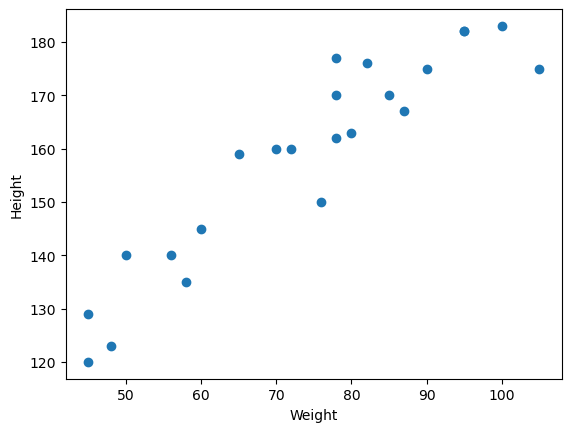

In [5]:
plt.scatter(df['Weight'],df['Height'])

plt.xlabel("Weight")
plt.ylabel("Height") 
plt.show()

In [ ]:
X=df[['Weight']]  ## for independent value 
y=df['Height']      ## for depnedent values

In [14]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [15]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [ ]:
# Calling the model from sk learn  spliting the data and training and  testing 
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
# give the idea of shape 
X.shape

(23, 1)

In [20]:
y.shape

(23,)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [22]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler() # this done to scale the data

In [24]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [25]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

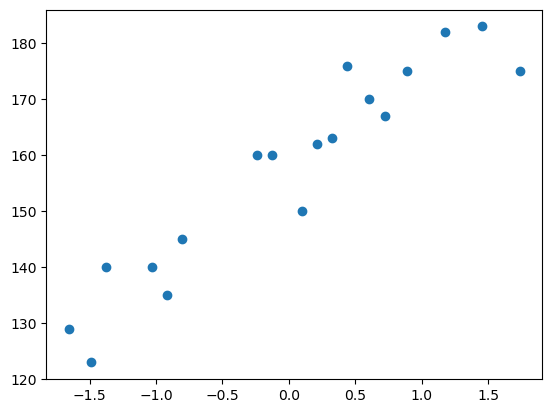

In [29]:
plt.scatter(X_train,y_train)
plt.show()

In [ ]:
#Implementing the model
from sklearn.linear_model import LinearRegression 


In [31]:
regression=LinearRegression()

In [32]:
regression.fit(X_train,y_train)

LinearRegression()

In [33]:
print("The slope or coefficient is:" , regression.coef_)
print("Intercept is:", regression.intercept_)

The slope or coefficient is: [17.03440872]
Intercept is: 157.5


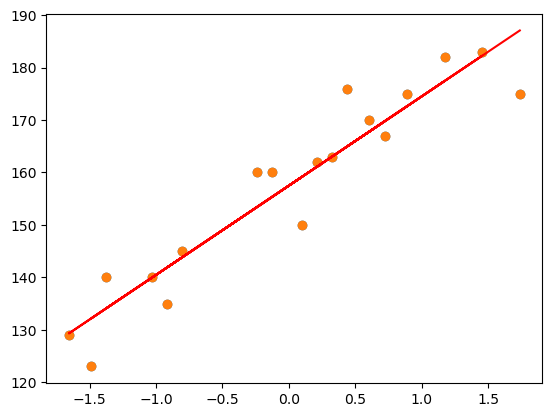

In [35]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='r')
plt.show()

In [36]:
y_pred_test=regression.predict(X_test)

In [37]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

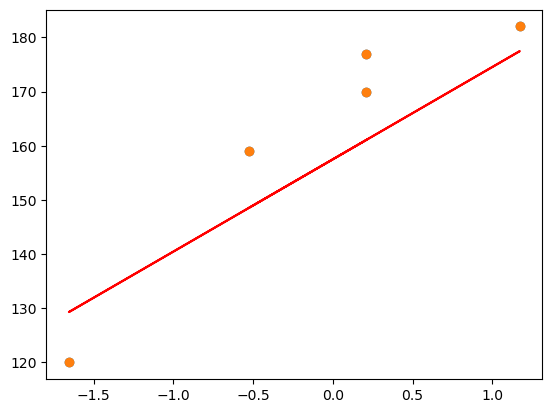

In [39]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test),'r')
plt.show()

# Performance Matrix

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [44]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

score=r2_score(y_test,y_pred_test)
score

109.77592599051654
9.822657814519227
10.477400726827076


0.7769869860423441

# Adjusted R Square

In [50]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [51]:
regression

LinearRegression()

In [52]:
scaled_weight=scaler.transform([[80]])
scaled_weight

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [53]:
scaled_weight[0]

array([0.32350772])

In [56]:
print("The height prediction for weight 80 is:",regression.predict([scaled_weight[0]]))

The height prediction for weight 80 is: [163.01076266]


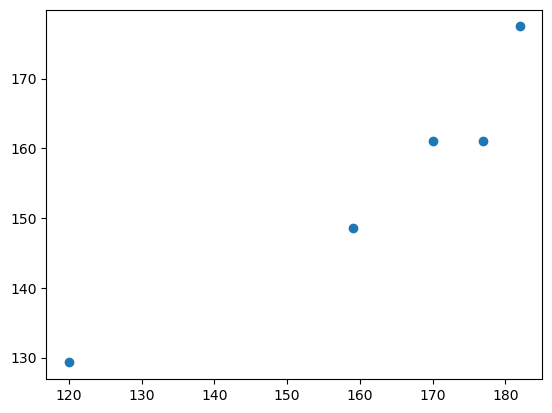

In [57]:
plt.scatter(y_test,y_pred_test)
plt.show()

In [67]:
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

/var/folders/2b/24czxhv96mxfyfd7pksr8p_00000gn/T/ipykernel_3473/2317517688.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


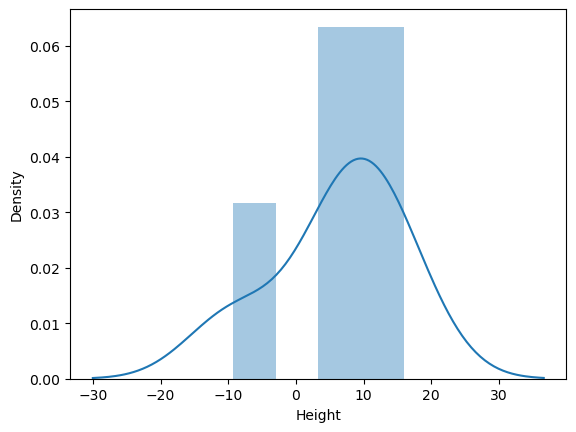

In [71]:
import seaborn as sns
sns.distplot(residuals,kde=True)
plt.show()

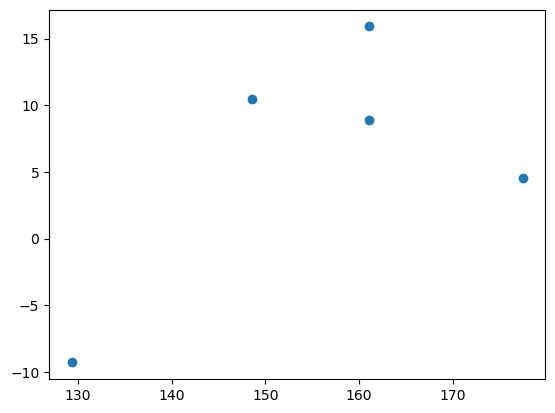

In [72]:
plt.scatter(y_pred_test,residuals)
plt.show()